**DOWNLOADS AND IMPORTS**

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/pycaret/pycaret/master/datasets/amazon.csv')
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


In [3]:
df['Positive'].value_counts()

Positive
1    15233
0     4767
Name: count, dtype: int64

**TEXT PREPROCESSING**

In [4]:
def preprocess_text(text):
    tokens = word_tokenize(text)

    filt_tokens = [token for token in tokens if token not in stopwords.words('english')]

    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filt_tokens]

    preprocessed_text = ' '.join(lemmatized_tokens)

    return preprocessed_text

In [5]:
df['reviewText'] = df['reviewText'].apply(preprocess_text)
df

,reviewText,Positive
0,This one best apps acording bunch people I agr...,1
1,This pretty good version game free . There LOT...,1
2,really cool game . bunch level find golden egg...,1
3,"This silly game frustrating , lot fun definite...",1
4,This terrific game pad . Hrs fun . My grandkid...,1
...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0
19996,Please add ! ! ! ! ! I need neighbor ! Ginger1...,1
19997,love ! game . awesome . wish free stuff house ...,1
19998,I love love love app side fashion story fight ...,1


**SENTIMENT ANALYSIS**

In [6]:
analyzer = SentimentIntensityAnalyzer()

In [7]:
def get_sentiment(text):
    
    scores = analyzer.polarity_scores(text)

    score = 1 if scores['pos'] > 0 else 0

    return score

In [8]:
df['Sentiment'] = df['reviewText'].apply(get_sentiment)
df

,reviewText,Positive,Sentiment
0,This one best apps acording bunch people I agr...,1,1
1,This pretty good version game free . There LOT...,1,1
2,really cool game . bunch level find golden egg...,1,1
3,"This silly game frustrating , lot fun definite...",1,1
4,This terrific game pad . Hrs fun . My grandkid...,1,1
...,...,...,...
19995,app fricken stupid.it froze kindle wont allow ...,0,0
19996,Please add ! ! ! ! ! I need neighbor ! Ginger1...,1,1
19997,love ! game . awesome . wish free stuff house ...,1,1
19998,I love love love app side fashion story fight ...,1,1


**EVALUATION**

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

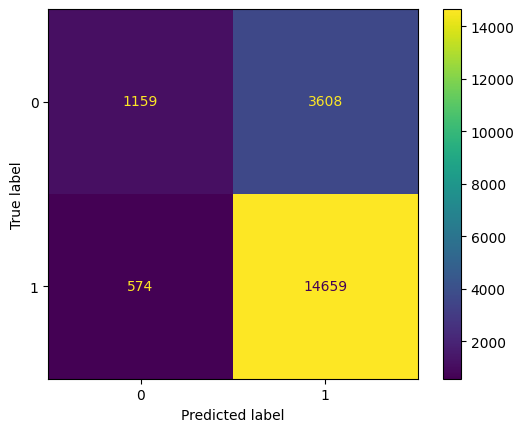

In [10]:
mat = confusion_matrix(df['Positive'],df['Sentiment'])

ConfusionMatrixDisplay(mat).plot()
plt.show()

In [11]:
accuracy_score(df['Positive'],df['Sentiment'])

0.7909

**The overall accuracy of this rule-based sentiment analysis model is 79%.**